# TensorFlow & Keras

TensorFlow ist für hier zu low-level, wir bedienen TF über die API Keras

**WICHTIG**: Hier wird TF 1.x genutzt.

Aktuelle Version: 2.x <br />
Die Unterschiede sind für das Beispiel hier aber irrelevant (nur die Syntax unterscheidet sich leicht)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# MNIST-digit Daten laden

In [2]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# get data-shapes
n_pics, n_rows, n_cols = X_train.shape
needed_input_shape = n_rows*n_cols
print("Maximalwert von X: {}".format(X_train.max()))
print("Daten-Struktur: {} X {} X {}".format(n_pics, n_rows, n_cols))

Maximalwert von X: 255
Daten-Struktur: 60000 X 28 X 28


In [3]:
X_train, X_test = X_train / X_train.max(), X_test / X_test.max()
print("skalierter Maximalwert von X: {}".format(X_train.max()))

skalierter Maximalwert von X: 1.0


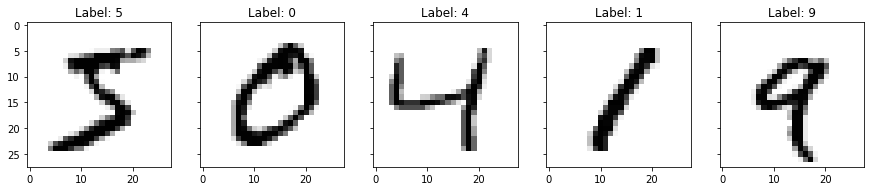

In [4]:
pics = [0, 1, 2, 3, 4]

fig, axs = plt.subplots(1, len(pics), figsize=(3*len(pics), 3), sharey=True)
for ax, pic in zip(axs, pics):
    ax.set_title("Label: {}".format(y_train[pic]))
    ax.imshow(X_train[pic], cmap="gray_r")
plt.show()

In [5]:
to_predict = 5
y_train, y_test = y_train == to_predict, y_test == to_predict

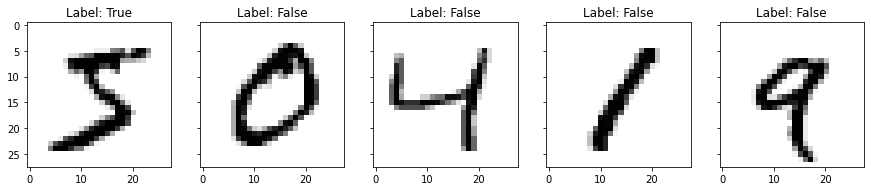

In [6]:
pics = [0, 1, 2, 3, 4]

fig, axs = plt.subplots(1, len(pics), figsize=(3*len(pics), 3), sharey=True)
for ax, pic in zip(axs, pics):
    ax.set_title("Label: {}".format(y_train[pic]))
    ax.imshow(X_train[pic], cmap="gray_r")
plt.show()

# Neuronales Netz definieren

Wir verwenden hier:
- das Model: [Sequential](https://keras.io/guides/sequential_model/)
- die Layer: [Dense](https://keras.io/api/layers/core_layers/dense/)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

# first hidden layer
model.add(Dense(5, activation="tanh", input_shape=(needed_input_shape,)))
#model.add(Dense(10, activation="relu"))

# output layer
model.add(Dense(1, activation="sigmoid", name="layer_out"))

model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 3925      
_________________________________________________________________
layer_out (Dense)            (None, 1)                 6         
Total params: 3,931
Trainable params: 3,931
Non-trainable params: 0
_________________________________________________________________


# ANN trainieren

In [11]:
model.fit(X_train.reshape(-1, needed_input_shape), y_train, epochs=10, batch_size=200)

Epoch 1/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1069 - accuracy: 0.9661
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.1045 - accuracy: 0.9666
Epoch 3/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.1023 - accuracy: 0.9671
Epoch 4/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1003 - accuracy: 0.9679
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0984 - accuracy: 0.9688
Epoch 6/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0966 - accuracy: 0.9692
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0950 - accuracy: 0.9699
Epoch 8/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0934 - accuracy: 0.9706
Epoch 9/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0918 - accuracy: 0.9710
Epoch 10/10
60000/60000 [==============================

In [12]:
y_pred_train = model.predict(X_train.reshape(-1, needed_input_shape)).ravel().round()
y_pred_test = model.predict(X_test.reshape(-1, needed_input_shape)).ravel().round()

print("train accuracy: {}".format(np.mean(y_pred_train == y_train).round(2)))
print("test accuracy: {}".format(np.mean(y_pred_test == y_test).round(2)))

train accuracy: 0.97
test accuracy: 0.97
